## Calculate coherence & distinctiveness scores for dictionaries by decade

**Authors**: Nancy Xu, UC Berkeley; Jaren Haber, PhD, Dartmouth College

**PI**: Prof. Heather Haveman, UC Berkeley

**Date created**: December 6, 2022

**Date last modified**: April 6, 2023

**Description**: This notebook calculates and visualizes the coherence score and distinctiveness score of core and expanded dictionaries over decades. Code for calculation based on code here: https://github.com/jhaber-zz/charters4textxd2018/blob/master/notebooks/wem_hackathon_TextXD18.ipynb

**Inputs:** 



*   decade word2vec models (models_storage/w2v_models)

```
wem_path1 = '../../models_storage/w2v_models/word2vec_1971-1981_phrased_filtered_enchant_orgdict_300d_10w_020423.bin'
wem_path2 = '../../models_storage/w2v_models/word2vec_1982-1992_phrased_filtered_enchant_orgdict_300d_10w_020423.bin'
wem_path3 = '../../models_storage/w2v_models/word2vec_1993-2003_phrased_filtered_enchant_orgdict_300d_10w_020423.bin'
wem_path4 = '../../models_storage/w2v_models/word2vec_2004-2014_phrased_filtered_enchant_orgdict_300d_10w_020423.bin'

```



*   core dictionaries 



```
cult_core = '../../dictionary_methods/dictionaries/core/cultural_core.csv'
dem_core = '../../dictionary_methods/dictionaries/core/demographic_core.csv'
relt_core = '../../dictionary_methods/dictionaries/core/relational_core.csv'


```

*  expanded decade dictionaries

```
1971-1981:

cult_expanded_1 = '../../dictionary_methods/dictionaries/expanded_decades/cultural_1971_1981.txt'
dem_expanded_1 = '../../dictionary_methods/dictionaries/expanded_decades/demographic_1971_1981.txt'
relt_expanded_1 = '../../dictionary_methods/dictionaries/expanded_decades/relational_1971_1981.txt'


1982-1992:

cult_expanded_2 = '../../dictionary_methods/dictionaries/expanded_decades/cultural_1982_1992.txt'
dem_expanded_2 = '../../dictionary_methods/dictionaries/expanded_decades/demographic_1982_1992.txt'
relt_expanded_2 = '../../dictionary_methods/dictionaries/expanded_decades/relational_1982_1992.txt'


1993-2003:

cult_expanded_3 = '../../dictionary_methods/dictionaries/expanded_decades/cultural_1993_2003.txt'
dem_expanded_3 = '../../dictionary_methods/dictionaries/expanded_decades/demographic_1993_2003.txt'
relt_expanded_3 = '../../dictionary_methods/dictionaries/expanded_decades/relational_1993_2003.txt'


2004-2014:

cult_expanded_4 = '../../dictionary_methods/dictionaries/expanded_decades/cultural_2004_2014.txt'
dem_expanded_4 = '../../dictionary_methods/dictionaries/expanded_decades/demographic_2004_2014.txt'
relt_expanded_4 = '../../dictionary_methods/dictionaries/expanded_decades/relational_2004_2014.txt'



```

**Outputs:** 

- graph of coherence scores over decades for core dictionaries
- graph of coherence scores over decades for expanded dictionaries
- graph of distinctiveness scores over decades for core dictionaries
- graph of distinctiveness scores over decades for expanded dictionaries






## Coherence scores over decades

In [22]:
import numpy as np
import pandas as pd
import gensim
import re
from gensim.models import KeyedVectors
from gensim.models import Word2Vec

## load in core dictionaries and expanded dictionaries

In [23]:
cult_core = list(pd.read_csv('/home/jovyan/work/dictionary_methods/dictionaries/core/cultural_core.csv', header=None)[0].apply(lambda x: x.replace(' ', '_')))
dem_core = list(pd.read_csv('/home/jovyan/work/dictionary_methods/dictionaries/core/demographic_core.csv', header=None)[0].apply(lambda x: x.replace(' ', '_')))
relt_core = list(pd.read_csv('/home/jovyan/work/dictionary_methods/dictionaries/core/relational_core.csv', header=None)[0].apply(lambda x: x.replace(' ', '_')))


In [24]:
cult_expanded_1 = pd.read_csv('../../dictionary_methods/dictionaries/expanded_decades/cultural_1971_1981.txt', header=None)[0].apply(lambda x: x.replace(' ', '_'))
dem_expanded_1 = pd.read_csv('../../dictionary_methods/dictionaries/expanded_decades/demographic_1971_1981.txt', header=None)[0].apply(lambda x: x.replace(' ', '_'))
relt_expanded_1 = pd.read_csv('../../dictionary_methods/dictionaries/expanded_decades/relational_1971_1981.txt', header=None)[0].apply(lambda x: x.replace(' ', '_'))


In [25]:
cult_expanded_2 = pd.read_csv('../../dictionary_methods/dictionaries/expanded_decades/cultural_1982_1992.txt', header=None)[0].apply(lambda x: x.replace(' ', '_'))
dem_expanded_2 = pd.read_csv('../../dictionary_methods/dictionaries/expanded_decades/demographic_1982_1992.txt', header=None)[0].apply(lambda x: x.replace(' ', '_'))
relt_expanded_2 = pd.read_csv('../../dictionary_methods/dictionaries/expanded_decades/relational_1982_1992.txt', header=None)[0].apply(lambda x: x.replace(' ', '_'))


In [26]:
cult_expanded_3 = pd.read_csv('../../dictionary_methods/dictionaries/expanded_decades/cultural_1993_2003.txt', header=None)[0].apply(lambda x: x.replace(' ', '_'))
dem_expanded_3 = pd.read_csv('../../dictionary_methods/dictionaries/expanded_decades/demographic_1993_2003.txt', header=None)[0].apply(lambda x: x.replace(' ', '_'))
relt_expanded_3 = pd.read_csv('../../dictionary_methods/dictionaries/expanded_decades/relational_1993_2003.txt', header=None)[0].apply(lambda x: x.replace(' ', '_'))


In [27]:
cult_expanded_4 = pd.read_csv('../../dictionary_methods/dictionaries/expanded_decades/cultural_2004_2014.txt', header=None)[0].apply(lambda x: x.replace(' ', '_'))
dem_expanded_4 = pd.read_csv('../../dictionary_methods/dictionaries/expanded_decades/demographic_2004_2014.txt', header=None)[0].apply(lambda x: x.replace(' ', '_'))
relt_expanded_4 = pd.read_csv('../../dictionary_methods/dictionaries/expanded_decades/relational_2004_2014.txt', header=None)[0].apply(lambda x: x.replace(' ', '_'))


In [28]:
core_lists = [dem_core,relt_core,cult_core]

In [29]:
years = ['1971-1981','1982-1992','1993-2003','2004-2014']

## load in w2v decade models

In [30]:
wem_path1 = '/home/jovyan/work/models_storage/w2v_models/word2vec_1971-1981_phrased_filtered_enchant_orgdict_300d_10w_020423.bin'
wem_path2 = '/home/jovyan/work/models_storage/w2v_models/word2vec_1982-1992_phrased_filtered_enchant_orgdict_300d_10w_020423.bin'
wem_path3 = '/home/jovyan/work/models_storage/w2v_models/word2vec_1993-2003_phrased_filtered_enchant_orgdict_300d_10w_020423.bin'
wem_path4 = '/home/jovyan/work/models_storage/w2v_models/word2vec_2004-2014_phrased_filtered_enchant_orgdict_300d_10w_020423.bin'


m1 = KeyedVectors.load(wem_path1)
m2 = KeyedVectors.load(wem_path2)
m3 = KeyedVectors.load(wem_path3)
m4 = KeyedVectors.load(wem_path4)
models = [m1, m2, m3, m4]


## calculate the coherence score of each dictionary

In [31]:
def dict_cohere(thisdict, wem_model):
    '''Computes the average cosine similarity score of terms within one dictionary with all other terms in that same dictionary,
    effectively measuring the coherence of the dictionary.
    ...question for development: does it make sense to compare the average cosine similarity score between all terms 
    in thisdict and the average cosine similarity among the total model vocabulary? (Could that be, by definition, 0?)
    
    NOTE: For an unknown reason, calling this function deletes terms from thisdict.
    
    Inputs: List of key terms, word2vec model.
    Output: Average cosine similarity score of each word with all other words in the list of key terms.'''
    
    # Initialize average distance variables:

    sim_scores = []
    
    # Compute average cosine similarity score of each word with other dict words:
    for index in np.arange(len(thisdict)):
 
        other_words = thisdict[:index] + thisdict[index+1:]
        word = thisdict[index]
        sim_score_with_others = []
        for other in other_words:
          try:
            sim_score_with_others.append(wem_model.wv.similarity(word, other))
          except:
            pass
        
        if (len(sim_score_with_others)!=0):
          word_avg_sim = np.mean(sim_score_with_others)
          # print(word_avg_sim)
          sim_scores.append(word_avg_sim)# Add up each average distance, incrementally
     

    
    return np.mean(sim_scores)

In [32]:
## calculate coherence score of expanded decade dicts
dem_1970_cohere_exp = dict_cohere(list(dem_expanded_1),m1)
cult_1970_cohere_exp = dict_cohere(list(cult_expanded_1),m1)
rela_1970_cohere_exp = dict_cohere(list(relt_expanded_1),m1)

dem_1980_cohere_exp = dict_cohere(list(dem_expanded_2),m2)
cult_1980_cohere_exp = dict_cohere(list(cult_expanded_2),m2)
rela_1980_cohere_exp = dict_cohere(list(relt_expanded_2),m2)

dem_1990_cohere_exp = dict_cohere(list(dem_expanded_3),m3)
cult_1990_cohere_exp = dict_cohere(list(cult_expanded_3),m3)
rela_1990_cohere_exp = dict_cohere(list(relt_expanded_3),m3)

dem_2000_cohere_exp = dict_cohere(list(dem_expanded_4),m4)
cult_2000_cohere_exp = dict_cohere(list(cult_expanded_4),m4)
rela_2000_cohere_exp = dict_cohere(list(relt_expanded_4),m4)

In [33]:
## calculate coherence score of core decade dicts

dem_1970_cohere = dict_cohere(dem_core,m1)
cult_1970_cohere = dict_cohere(cult_core,m1)
rela_1970_cohere = dict_cohere(relt_core,m1)

dem_1980_cohere = dict_cohere(dem_core,m2)
cult_1980_cohere = dict_cohere(cult_core,m2)
rela_1980_cohere = dict_cohere(relt_core,m2)

dem_1990_cohere = dict_cohere(dem_core,m3)
cult_1990_cohere = dict_cohere(cult_core,m3)
rela_1990_cohere = dict_cohere(relt_core,m3)

dem_2000_cohere = dict_cohere(dem_core,m4)
cult_2000_cohere = dict_cohere(cult_core,m4)
rela_2000_cohere = dict_cohere(relt_core,m4)

## graph coherence score for expanded decade dicts

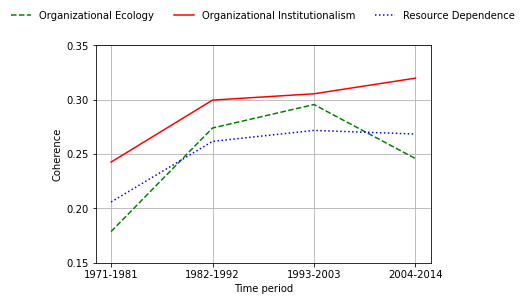

In [35]:
import matplotlib.pyplot as plt
plt.plot(years,[dem_1970_cohere_exp,dem_1980_cohere_exp,dem_1990_cohere_exp,dem_2000_cohere_exp],'--', label='Organizational Ecology', color = 'green')

plt.plot(years,[cult_1970_cohere_exp,cult_1980_cohere_exp,cult_1990_cohere_exp,cult_2000_cohere_exp],label='Organizational Institutionalism', color = 'red')

plt.plot(years,[rela_1970_cohere_exp,rela_1980_cohere_exp,rela_1990_cohere_exp,rela_2000_cohere_exp],':', label='Resource Dependence', color = 'blue')

plt.xlabel('Time period')
plt.ylabel('Coherence')


ax = plt.subplot(111)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=3, frameon=False)


plt.ylim(0.15, 0.35)
plt.yticks(np.linspace(0.15, 0.35, 5))
plt.grid()

filepath = 'coherence_score_expanded_dict' + ".png"
plt.savefig(filepath, bbox_inches='tight', dpi= 2000)



## graph coherence score for core decade dicts¶

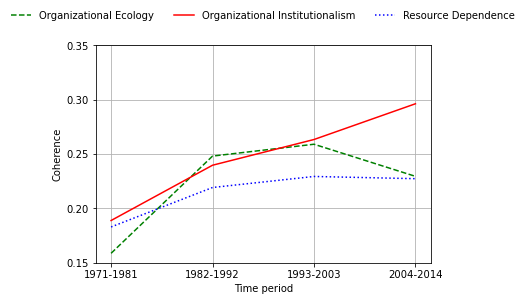

In [36]:
import matplotlib.pyplot as plt
plt.plot(years,[dem_1970_cohere,dem_1980_cohere,dem_1990_cohere,dem_2000_cohere],'--', label='Organizational Ecology', color = 'green')

plt.plot(years,[cult_1970_cohere,cult_1980_cohere,cult_1990_cohere,cult_2000_cohere], label='Organizational Institutionalism', color = 'red')

plt.plot(years,[rela_1970_cohere,rela_1980_cohere,rela_1990_cohere,rela_2000_cohere],':', label='Resource Dependence', color = 'blue')

plt.xlabel('Time period')
plt.ylabel('Coherence')

# plt.title('Coherence scores vs. decades')
ax = plt.subplot(111)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=3, frameon=False)


# plt.legend();
plt.ylim(0.15, 0.35)
plt.yticks(np.linspace(0.15, 0.35, 5))
plt.grid()
filepath =  'coherence_score_core_dict' + ".png"

plt.savefig(filepath, bbox_inches='tight', dpi= 2000)

### Calculate distinctiveness scores of each dictionary 

In [37]:
def dict_distinct(dict1, dict2, wem_model):
    '''Computes the average cosine distance score of terms in dict1 with all terms in dict2,
    effectively measuring the opposition/non-coherence between the two dictionaries.
    
    NOTE: For an unknown reason, calling this function deletes terms from thisdict.
    
    Inputs: List of key terms, word2vec model.
    Output: Average cosine distance score of each word in dict1 with all words in dict2.'''
    
    
    sim_scores = []
    
    # Compute average cosine distance score of each word with other dict words:
    for index in np.arange(len(dict1)):
 
        other_words = dict2
        word = dict1[index]
        sim_score_with_others = []
        for other in other_words:
          try:
            ## get cosine distance 
            sim_score_with_others.append(1-wem_model.wv.similarity(word, other))
          except:
            pass
        
        if (len(sim_score_with_others)!=0):
          word_avg_sim = np.mean(sim_score_with_others)
          sim_scores.append(word_avg_sim)# Add up each average distance, incrementally
     

    
    return np.mean(sim_scores)



In [38]:
def get_distinct_score_df(l1=None, l2=None, l3=None, l4=None, expanded = False):
    """
    
    get a pandas dataframe that contains the distinctiveness score for each decade and each dictionary
    
    input:
        
        l1 = list of expanded dictionaries for decade 1 (None for core decade dicts)
        l2 = list of expanded dictionaries for decade 2 (None for core decade dicts)
        l3 = list of expanded dictionaries for decade 3 (None for core decade dicts)
        l4 = list of expanded dictionaries for decade 4 (None for core decade dicts)
        expanded = boolean indicating whether we get the df for  expanded decade dicts  or core decade dicts
    
    output: 
        df storing distinctive score for each decade dicts 
    
    
    """
    ## if we want to get the scores for expanded decade dicts, 
    ## using the expanded dictionaries passed as inputs 
    if expanded: 
        year_coresp_dict_lst={}
        year_coresp_dict_lst['1971-1981'] = l1
        year_coresp_dict_lst['1982-1992'] = l2
        year_coresp_dict_lst['1993-2003'] = l3
        year_coresp_dict_lst['2004-2014'] = l4

    
    distinct_scores_decade_perspective={}
   
    ### iterate through each of the 4 periods, using the period-specific models
    
    for y,m in zip(years, models):
        
        distinct_scores_perspective={}
        
        ### for each period, iterate through the 3 perspectives to calculate their distinct scores
        for core,k in zip(['cult','dem','relt'],np.arange(3)):
            
            if expanded:
                ### use the expanded decade dicts
                current_lst = year_coresp_dict_lst[y][k]
                other_lsts = year_coresp_dict_lst[y][:k] + year_coresp_dict_lst[y][k+1:]
            else:
                ### use the core dicts
                current_lst = core_lists[k]
                other_lsts = core_lists[:k] + core_lists[k+1:]
           
            ## get the the mean distinct score for this dictionary with the dicts of the other 2 perspectives
            distinct_scores_perspective[core]= np.mean([dict_distinct(current_lst, other_lsts[0], m), dict_distinct(current_lst, other_lsts[1], m)])
        
        ## store the distrinct scores for each of the 3 perspectives for each year 
        distinct_scores_decade_perspective[y] = distinct_scores_perspective
        
    
    distinct_results= pd.DataFrame(distinct_scores_decade_perspective).T
    
    return distinct_results
    

In [39]:
### get a pandas df storing distinctive score for each expanded decade dicts 
exp_list_1 =[cult_expanded_1, dem_expanded_1, relt_expanded_1] 
exp_list_2 =[cult_expanded_2, dem_expanded_2, relt_expanded_2] 
exp_list_3 =[cult_expanded_3, dem_expanded_3, relt_expanded_3] 
exp_list_4 =[cult_expanded_4, dem_expanded_4, relt_expanded_4] 
distinct_results_exp = get_distinct_score_df(exp_list_1,exp_list_2,exp_list_3, exp_list_4, True  )
distinct_results_exp

,cult,dem,relt
1971-1981,0.869420,0.872100,0.872234
1982-1992,0.838583,0.846238,0.835160
1993-2003,0.821204,0.817920,0.817782
2004-2014,0.822025,0.821506,0.820986


In [40]:
### get a pandas df storing distinctive score for each core decade dicts 
core_lists = [dem_core,relt_core,cult_core]
distinct_results = get_distinct_score_df(expanded =False  )
distinct_results

,cult,dem,relt
1971-1981,0.875132,0.874976,0.870313
1982-1992,0.841692,0.846753,0.839574
1993-2003,0.830684,0.832431,0.825659
2004-2014,0.824220,0.829504,0.818533


## plot distinctive score for expanded decade dicts

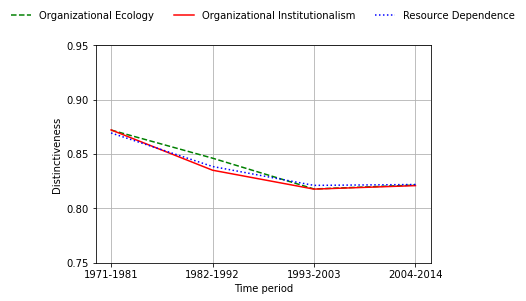

In [41]:
plt.plot(distinct_results_exp['dem'],'--', label='Organizational Ecology', color = 'green')

plt.plot(distinct_results_exp['relt'], label='Organizational Institutionalism', color = 'red')

plt.plot(distinct_results_exp['cult'],':', label='Resource Dependence', color = 'blue')
distinct_results_exp
plt.xlabel('Time period')
plt.ylabel('Distinctiveness')
ax = plt.subplot(111)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=3, frameon=False)
# plt.title('Distinctiveness (cosine distance) vs. decades')

plt.ylim(0.75, 0.95)
plt.yticks(np.linspace(0.75,  0.95, 5))
plt.grid()

filepath = 'distinctiveness_score_expanded_dict' + ".png"

plt.savefig(filepath, bbox_inches='tight', dpi= 2000)

## plot distinctive score for core decade dicts¶

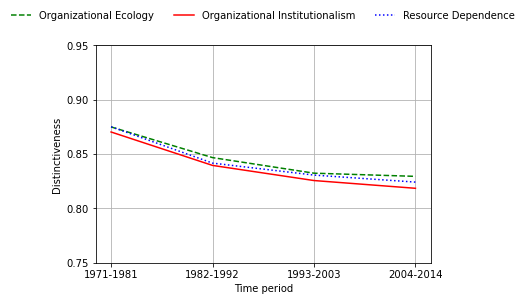

In [42]:
plt.plot(distinct_results['dem'], '--', label='Organizational Ecology', color = 'green')

plt.plot(distinct_results['relt'],label='Organizational Institutionalism', color = 'red')

plt.plot(distinct_results['cult'], ':',label='Resource Dependence', color = 'blue')

plt.xlabel('Time period')
plt.ylabel('Distinctiveness')


ax = plt.subplot(111)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=3, frameon=False)


plt.ylim(0.75, 0.95)
plt.yticks(np.linspace(0.75,  0.95, 5))
plt.grid()


filepath =  'distinctiveness_score_core_dict_revised' + ".png"

plt.savefig(filepath, bbox_inches='tight', dpi= 2000)